# Predicting Spotify Song Popularity Score Based on Their Audio Features and Metadata

### Data Pre-Processing & Preliminary Examination:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import requests

In [3]:
# Load the dataset
url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print("Dataset Preview:")
df.head()

Dataset Preview:


,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


In [4]:
# Basic Info
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169909 non-null  object 
 1   name              169909 non-null  object 
 2   artists           169909 non-null  object 
 3   duration_ms       169909 non-null  int64  
 4   release_date      169909 non-null  object 
 5   year              169909 non-null  int64  
 6   acousticness      169909 non-null  float64
 7   danceability      169909 non-null  float64
 8   energy            169909 non-null  float64
 9   instrumentalness  169909 non-null  float64
 10  liveness          169909 non-null  float64
 11  loudness          169909 non-null  float64
 12  speechiness       169909 non-null  float64
 13  tempo             169909 non-null  float64
 14  valence           169909 non-null  float64
 15  mode              169909 non-null  int64  
 16  key  

In [5]:
# Drop rows with null/0 values & irrelevant columns
df = df.dropna()
df = df[(df != 0).all(axis=1)]
irrelevant_cols = ['id', 'name', 'artists', 'release_date']
df = df.drop(columns=irrelevant_cols, axis=1)

In [6]:
#final dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2788 entries, 2998 to 169904
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       2788 non-null   int64  
 1   year              2788 non-null   int64  
 2   acousticness      2788 non-null   float64
 3   danceability      2788 non-null   float64
 4   energy            2788 non-null   float64
 5   instrumentalness  2788 non-null   float64
 6   liveness          2788 non-null   float64
 7   loudness          2788 non-null   float64
 8   speechiness       2788 non-null   float64
 9   tempo             2788 non-null   float64
 10  valence           2788 non-null   float64
 11  mode              2788 non-null   int64  
 12  key               2788 non-null   int64  
 13  popularity        2788 non-null   int64  
 14  explicit          2788 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 348.5 KB


## Exploratory Data Analysis

In [7]:
df.head()

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
2998,90578,1969,0.043000,0.881,0.713,0.905000,0.223,-9.665,0.0565,106.052,0.454,1,1,26,1
3604,130000,1975,0.860000,0.463,0.847,0.000032,0.936,-12.477,0.9360,110.840,0.268,1,2,27,1
3799,150627,1977,0.001500,0.388,0.825,0.000004,0.138,-10.555,0.0557,159.744,0.853,1,9,39,1
3929,276933,1978,0.527000,0.474,0.938,0.520000,0.299,-2.643,0.0898,71.995,0.505,1,9,26,1
4341,185773,1982,0.000885,0.574,0.875,0.015000,0.120,-6.046,0.0414,102.867,0.848,1,10,31,1


### Basic Statistics

In [8]:
# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
        duration_ms         year  acousticness  danceability       energy  \
count  2.788000e+03  2788.000000   2788.000000   2788.000000  2788.000000   
mean   2.307169e+05  2004.836801      0.148508      0.633344     0.700890   
std    9.097025e+04    11.875849      0.225488      0.188567     0.198072   
min    3.616000e+04  1929.000000      0.000002      0.114000     0.019600   
25%    1.842098e+05  1996.000000      0.003870      0.494750     0.556000   
50%    2.236800e+05  2005.000000      0.038050      0.657500     0.711500   
75%    2.664400e+05  2016.000000      0.194000      0.787000     0.871250   
max    2.703227e+06  2020.000000      0.993000      0.986000     0.999000   

       instrumentalness     liveness     loudness  speechiness        tempo  \
count       2788.000000  2788.000000  2788.000000  2788.000000  2788.000000   
mean           0.059168     0.223048    -7.231803     0.163160   121.624207   
std            0.174068     0.185337     3.249944 

In [9]:
# Display range of years
print(f"\nYear range: {df['year'].min()} to {df['year'].max()}")


Year range: 1929 to 2020


In [10]:
# Display range of popularity
print(f"\nPopularity range: {df['popularity'].min()} to {df['popularity'].max()}")


Popularity range: 1 to 95


### Descriptive Statistics

In [11]:
# Descriptive Statistics
print("\nMinimum Release Year:", df['year'].min())
print("Maximum Release Year:", df['year'].max())
print("Minimum Tempo:", df['tempo'].min())
print("Maximum Tempo:", df['tempo'].max())
print("\nMean Popularity:", df['popularity'].mean())
print("Median Popularity:", df['popularity'].median())
print("Minimum Popularity:", df['popularity'].min())
print("Maximum Popularity:", df['popularity'].max())


Minimum Release Year: 1929
Maximum Release Year: 2020
Minimum Tempo: 45.518
Maximum Tempo: 215.669

Mean Popularity: 52.32604017216643
Median Popularity: 52.0
Minimum Popularity: 1
Maximum Popularity: 95


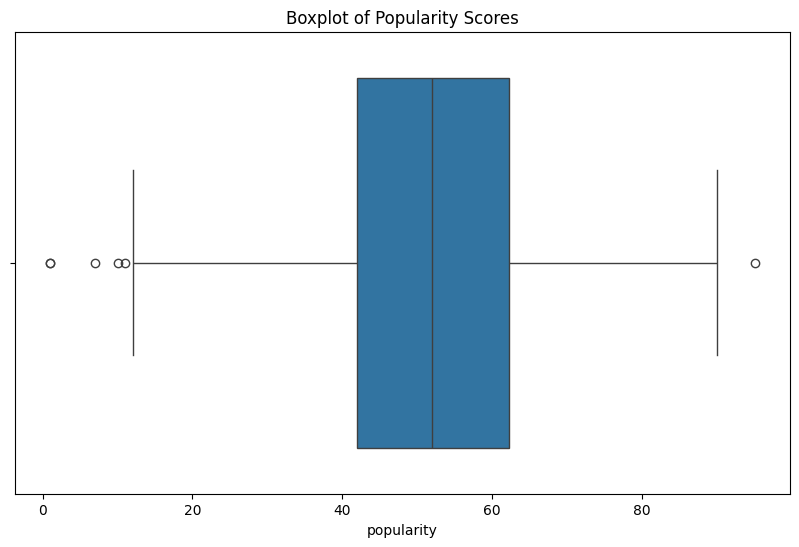

In [12]:
# Box & Whisker plot of popularity scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='popularity')
plt.title('Boxplot of Popularity Scores')
plt.show()

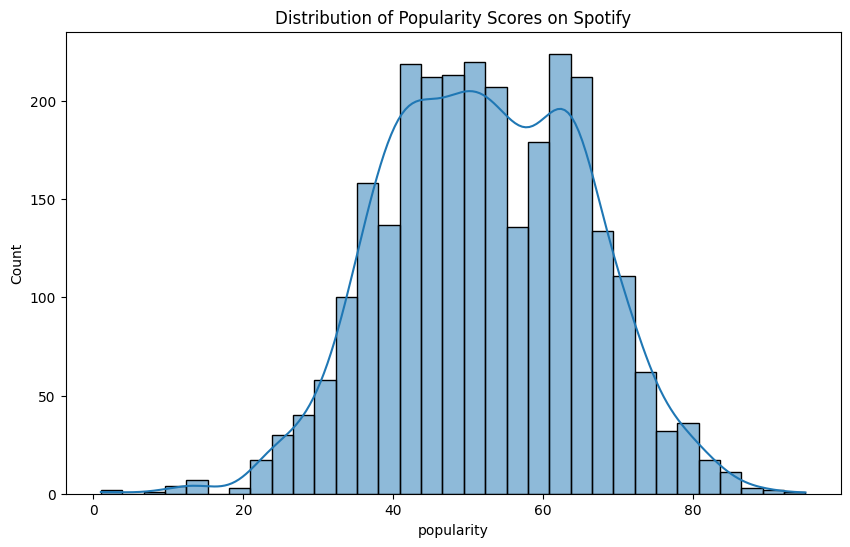

In [13]:
# Histogram of popularity scores
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='popularity', kde = True)
plt.title('Distribution of Popularity Scores on Spotify')
plt.show()

### Initial Visualizations

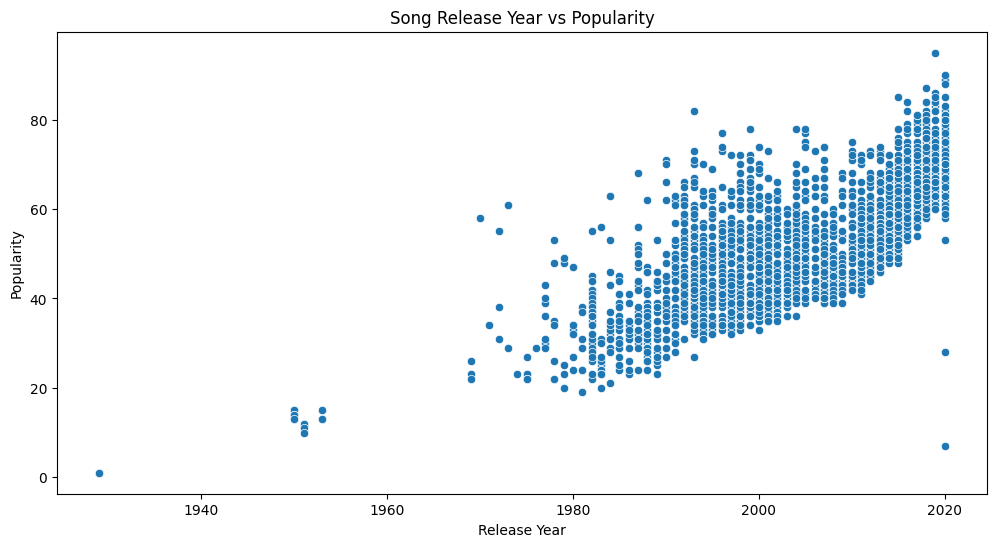

In [ ]:
# Scatterplot of Release Year vs Popularity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='year', y='popularity')
plt.title('Song Release Year vs Popularity')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.show()

In [ ]:
# Plot energy against popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='energy', y='popularity')
plt.title('Energy vs Popularity')
plt.show()

In [ ]:
# Plot danceability against popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='danceability', y='popularity')
plt.title('Danceability vs Popularity')
plt.show()

In [ ]:
# Scatterplot of Loudness vs Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='loudness', y='popularity', hue='energy', palette='magma')
plt.title('Loudness vs Popularity')
plt.xlabel('Loudness (dB)')
plt.ylabel('Popularity')
plt.show()

In [ ]:
# Barplot of Key Mode vs Popularity
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='key', y='popularity', ci = None)
plt.title('Popularity by Key')
plt.xlabel('Key')
plt.ylabel('Popularity')
plt.show()

In [ ]:
# Scatterplot of Tempo vs Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tempo', y='popularity', hue='danceability', palette='cool')
plt.title('Tempo vs Popularity')
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.show()


In [ ]:
# Box plot of popularity by decade
df['decade'] = (df['year'] // 10) * 10
plt.figure(figsize=(12, 10))
sns.boxplot(x='decade', y='popularity', data=df)
plt.title('Song Popularity by Decade')
plt.xlabel('Decade')
plt.ylabel('Popularity Score')
plt.show()

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
import torch
import torch.nn as nn
import torch.optim as optim

### Baseline Model

In [ ]:
# Set up baseline model using mean popularity score
y = df['popularity']
baseline_preds = np.ones(len(y)) * y.mean()
baseline_mse = mean_squared_error(y, baseline_preds)

print(f"Baseline MSE: {baseline_mse:.4f}")

In [ ]:
# Calculate RMSE
baseline_rmse = np.sqrt(baseline_mse)
print(f"Baseline RMSE: {baseline_rmse:.4f}")

#Regression Models

### Preparing data for modeling

In [ ]:
# Select features (X) and target variable (y)
X = df.drop(columns=['popularity'])  # Features
y = df['popularity']  # Target variable

# Splitting the dataset into training and test sets (80% - 20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the train-test split
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression Model

In [ ]:
# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Calculate MSE and R2 score
lr_train_mse = mean_squared_error(y_train, y_train_pred_lr)
lr_test_mse = mean_squared_error(y_test, y_test_pred_lr)
lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_test_r2 = r2_score(y_test, y_test_pred_lr)

print("Linear Regression Results:")
print(f"Train MSE: {lr_train_mse:.4f}")
print(f"Test MSE: {lr_test_mse:.4f}")
print(f"Train R2: {lr_train_r2:.4f}")
print(f"Test R2: {lr_test_r2:.4f}")

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(lr_model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 5 important features:")
print(feature_importance.head())

In [ ]:
# Visualize residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_lr, y_test - y_test_pred_lr)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### K-Nearest Neighbors Regression Model

In [ ]:
# Create a pipeline with scaling and KNN
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())
])

In [ ]:
# Define parameter grid
param_grid = {
    'model__n_neighbors': [5, 10, 15, 20, 25, 30],
    'model__weights': ['uniform', 'distance']
}


In [ ]:
# Perform grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


In [ ]:
# Get best model
best_knn = grid_search.best_estimator_

In [ ]:
# Make predictions
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

In [ ]:
# Calculate MSE and R2 score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")

In [ ]:
# Feature importance using permutation importance
from sklearn.inspection import permutation_importance

r = permutation_importance(best_knn, X_test, y_test, n_repeats=10, random_state=42)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': r.importances_mean
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance.head(10))

### Decision Tree Regression

In [ ]:
# Create a pipeline with scaling and Decision Tree
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(random_state=42))
])

In [ ]:
# Train and test scores for different depths
max_depths = range(1, 20)
train_scores = []
test_scores = []

for depth in max_depths:
    pipe.set_params(model__max_depth=depth)
    pipe.fit(X_train, y_train)
    train_scores.append(mean_squared_error(y_train, pipe.predict(X_train)))
    test_scores.append(mean_squared_error(y_test, pipe.predict(X_test)))

In [ ]:
# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores,'--o', label='Train')
plt.plot(max_depths, test_scores,'--o', label='Test')
plt.grid()
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Decision Tree: Max Depth vs MSE')
plt.legend()
plt.show()

In [ ]:
# Choose the best depth (lowest test MSE)
best_depth = max_depths[test_scores.index(min(test_scores))]

In [ ]:
# Train the final model
best_dt = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
best_dt.fit(X_train, y_train)

In [ ]:
# Make predictions
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)


In [ ]:
# Calculate MSE and R2 score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Best depth: {best_depth}")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_dt.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance.head(10))

### Random Forest Regression

In [ ]:
# Create a pipeline with scaling and Random Forest
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

In [ ]:
# Define parameter grid
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [5, 10, 15, None],
    'model__min_samples_split': [2, 5, 10]
}

In [ ]:
# Perform grid search
grid_search = GridSearchCV(pipe, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

In [ ]:
# Get best model
best_rf = grid_search.best_estimator_

In [ ]:
# Make predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)


In [ ]:
# Calculate MSE and R2 score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.named_steps['model'].feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance.head(10))

### Gradient Boosting Regression

In [ ]:
# Create a pipeline with scaling and Gradient Boosting
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Define parameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.3],
    'model__max_depth': [3, 4, 5]
}

# Perform grid search
grid_search = GridSearchCV(pipe, param_grid, cv=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get best model
best_gb = grid_search.best_estimator_

# Make predictions
y_train_pred = best_gb.predict(X_train)
y_test_pred = best_gb.predict(X_test)

# Calculate MSE and R2 score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_gb.named_steps['model'].feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance.head(10))

### Neural Networks (PyTorch)

In [ ]:
# Define the neural network
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

# Initialize the model
model = Net(X_train.shape[1])

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
batch_size = 32

for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train_tensor)
    y_test_pred = model(X_test_tensor)

    train_mse = criterion(y_train_pred, y_train_tensor)
    test_mse = criterion(y_test_pred, y_test_tensor)

    train_r2 = r2_score(y_train_tensor.numpy(), y_train_pred.numpy())
    test_r2 = r2_score(y_test_tensor.numpy(), y_test_pred.numpy())

print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R2 Score: {train_r2:.4f}")
print(f"Testing R2 Score: {test_r2:.4f}")